# Pytorch를 사용한 QSAR 모델 구축(Classification


* python==3.6
* deepchem==2.3.0
* Rdkit==1.16
* tensorflow==1.14

# colab 환경

In [ ]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  13740      0 --:--:-- --:--:-- --:--:-- 13686


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added conda-forge to channels
added omnia to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda



In [ ]:
#!pip install tensorflow~=2.4
#!pip install deepchem
#!pip install rdkit-pypi

In [ ]:
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!chmod +x Miniconda3-latest-Linux-x86_64.sh
#!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
#!time conda install -q -y -c conda-forge python=3.6
#!time conda install -q -y -c conda-forge rdkit==2020.09.2

In [ ]:
import deepchem as dc
print(dc.__version__)

2.5.0


In [ ]:
!python --version

Python 3.8.8


In [ ]:
import torch
torch.__version__

'1.9.1'

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd

RDKit WARNING: [10:28:03] Enabling RDKit 2019.09.3 jupyter extensions


## Load to data 

#구글 드라이브 파일 경로에 데이터 직접 업로드
http://moleculenet.ai/datasets-1
BBBP데이터셋 다운로드 후 압축풀고 BBBP.csv데이터 업로드



In [ ]:
# 직접 업로드없이 url에서 데이터 다운로드 but, zip형태이므로 압축해제한 후 사용해야함
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip

--2021-11-24 10:28:11--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)을(를) 해석하는 중... 3.5.163.15
접속 s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|3.5.163.15|:443... 접속됨.
HTTP 요청을 전송했습니다. 응답을 기다리는 중입니다... 200 OK
길이: 46174 (45K) [application/zip]
다음 위치에 저장: `bbbp.zip.1'

bbbp.zip.1          100%[===================>]  45.09K  --.-KB/s    / 0.1s     

2021-11-24 10:28:11 (319 KB/s) - `bbbp.zip.1' 저장됨 [46174/46174]



In [ ]:
!ls
!unzip bbbp.zip

06_decision_trees.ipynb			       delaney-processed.csv.15
07_ensemble_learning_and_random_forests.ipynb  delaney-processed.csv.16
10_neural_nets_with_keras.ipynb		       delaney-processed.csv.17
10주차_분류모델_1.ipynb			       delaney-processed.csv.18
10주차_파이토치딥러닝_2.ipynb		       delaney-processed.csv.19
10주차_파이토치딥러닝_3.ipynb		       delaney-processed.csv.2
11주차_합성곱신경망_1.ipynb		       delaney-processed.csv.20
12주차_DeepChem사용_2.ipynb		       delaney-processed.csv.3
12주차_분자다루기_1.ipynb		       delaney-processed.csv.4
13주차_PytorchQSAR_Classification_2.ipynb      delaney-processed.csv.5
13주차_PytorchQSAR_Prediction_1.ipynb	       delaney-processed.csv.6
2주차-마크다운사용법.ipynb		       delaney-processed.csv.7
2주차-파이썬기초-1.ipynb		       delaney-processed.csv.8
2주차-파이썬기초-2.ipynb		       delaney-processed.csv.9
2주차-파이썬기초-3.ipynb		       h_12_회귀모델.ipynb
3주차-넘파이기초-1.ipynb		       img
3주차-파일다루기-3.ipynb		       img26.PNG
3주차-판다스기초-2.ipynb		       iris_tree.dot
4주차-Matplotlib-1.ipynb		       model_300dim.pkl
4주차-

## data EDA

In [ ]:
from deepchem.utils.save import load_from_disk

dataset_file= "BBBP.csv"
dataset = load_from_disk(dataset_file)
print("Columns of dataset: %s" % str(dataset.columns.values))
print("Number of examples in dataset: %s" % str(dataset.shape[0]))

deepchem.utils.save has been deprecated.
The utilities in save.py are moved to deepchem.utils.data_utils or deepchem.utils.genomics_utils.


Columns of dataset: ['num' 'name' 'p_np' 'smiles']
Number of examples in dataset: 2050


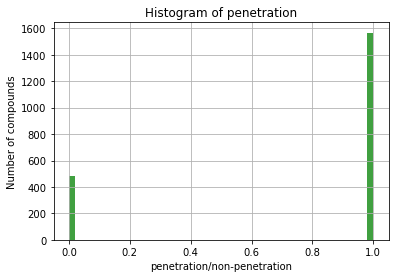

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

penetration = np.array(dataset["p_np"])
#히스토그램을 그리기 위한 함수 사용 단일 변수를 입력으로 주면 분포 히스토그램을 출력해주는 기능
#인터넷에 패키지 이름과 함수명으로 검색하면 아래와 같은 doc을 찾을 수 있음
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html
n, bins, patches = plt.hist(penetration, 50, facecolor='green', alpha=0.75)
#출력할 그래프의 x축 y축 이름을 설정하는 부분
plt.xlabel('penetration/non-penetration')
plt.ylabel('Number of compounds')
#그래프의 제목
plt.title(r'Histogram of penetration')
#격자 무늬 출력
plt.grid(True)
#그래프 출력 명령어
plt.show()


In [ ]:
import deepchem as dc
from rdkit import RDLogger
featurizer = dc.feat.CircularFingerprint(size=1024)
RDLogger.DisableLog('rdApp.*')

In [ ]:
#첫번째 인자는 해당 SMILES의 Label로 사용할 열의 이름
#두번째 인자는 변환할 SMILES 데이터가 존재하는 열의 이름
#세번째 인자는 앞서 생성한 Featurizer 객체
loader = dc.data.CSVLoader(
      tasks=["p_np"], smiles_field="smiles",
      featurizer=featurizer)
dataset = loader.featurize(dataset_file)

smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.
/home/dilab/anaconda3/lib/python3.8/site-packages/deepchem/data/data_loader.py:160: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(
Failed to featurize datapoint 59, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
Failed to featurize datapoint 61, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
Failed to featurize datapoint 391, None. Appending em

In [ ]:
print(dataset.X[0], dataset.y[0])
print(len(dataset.X[0]), len(dataset.y[0]))

[0. 1. 0. ... 0. 0. 0.] [1.]
1024 1


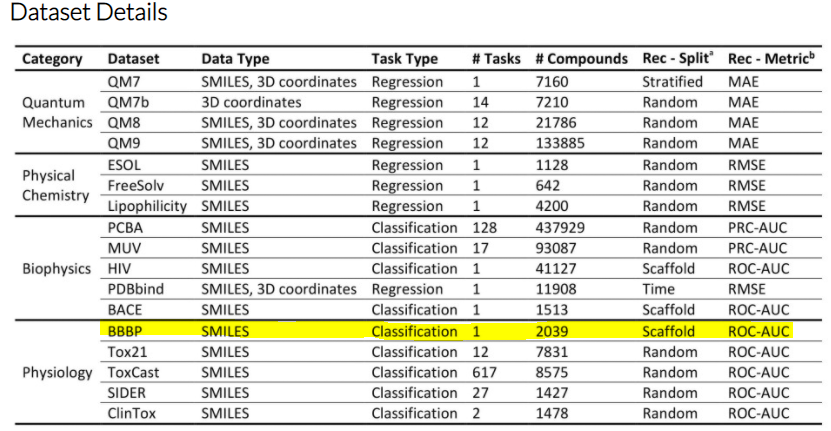

In [ ]:
splitter = dc.splits.ScaffoldSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)

In [ ]:
#데이터 표준화 과정 수행
transformers = [
    dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)]

for dataset in [train_dataset, valid_dataset, test_dataset]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)

In [ ]:
print(train_dataset.X[0], train_dataset.y[0])

[0. 0. 0. ... 0. 0. 0.] [1.]


## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

sklearn_model = RandomForestClassifier(n_estimators=100)
model = dc.models.SklearnModel(sklearn_model)
model.fit(train_dataset)

In [ ]:
from deepchem.utils.evaluate import Evaluator

metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean, mode="classification")
evaluator = Evaluator(model, valid_dataset, transformers)
#R2 score는 통계학에서는 결정계수라고 불리는데, 통계학 분야에서 의미하는 바와 같다.

roc_auc_score = evaluator.compute_model_performance([metric])
print(roc_auc_score)


{'mean-roc_auc_score': 0.9757375776397516}


In [ ]:
#dc.models.SklearnModel메서드에 주어진 모델 RandomForestRegressor 및 model_dir를 입력으로 줌
def rf_model_builder(n_estimators, max_features, model_dir):
  sklearn_model = RandomForestClassifier(
      n_estimators=n_estimators, max_features=max_features)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None]
}

metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean, mode="classification")#dc.hyper.HyperparamOpt를 사용하여 하이퍼 파라미터 최적화
#메서드 안에는 위에서 정의한 rf_model_builder를 입력
optimizer = dc.hyper.GridHyperparamOpt(rf_model_builder)
#dc.hyper.HyperparamOpt.hyperparam_search메서드에 파라미터 사전, 훈련 데이터세트, 검증 데이터세트, 변환기, 성능측정방법을 입력으로 줌
#최고 성능의 모델, 최고 성능의 하이퍼파라미터, 모든 결과를 변수에 담음
#출력문은 hyperparam_search메서드에서 주어진 log출력물
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, metric, transformers)

In [ ]:
#최고 성능을 보이는 모델 하이퍼파라미터 출력
print(best_rf)
#탐색할때 사용한 하이퍼파라미터의 최적 값 출력
print(best_rf_hyperparams)
#모든 탐색 성능 평가 결과 출력
print(all_rf_results)

SklearnModel(model=RandomForestClassifier(), model_dir='/tmp/tmpxjmpz76j')
(100, 'auto')
{'_max_featuresauto_n_estimators_10': 0.9381793478260869, '_max_featuressqrt_n_estimators_10': 0.9344429347826086, '_max_featureslog2_n_estimators_10': 0.9311917701863354, '_max_featuresNone_n_estimators_10': 0.9184782608695652, '_max_featuresauto_n_estimators_100': 0.968944099378882, '_max_featuressqrt_n_estimators_100': 0.9609375, '_max_featureslog2_n_estimators_100': 0.9683132763975155, '_max_featuresNone_n_estimators_100': 0.9440993788819876}


In [ ]:
rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)
rf_test_roc_auc_score = rf_test_evaluator.compute_model_performance([metric])
print("RF Test set roc_auc %f" % (rf_test_roc_auc_score["mean-roc_auc_score"]))

RF Test set roc_auc 0.720734


# Pytorch를 사용한 QSAR Modeling(Binary classification)

## load to data and Transform

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip

--2021-11-24 10:34:25--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)을(를) 해석하는 중... 52.219.120.176
접속 s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.176|:443... 접속됨.
HTTP 요청을 전송했습니다. 응답을 기다리는 중입니다... 200 OK
길이: 46174 (45K) [application/zip]
다음 위치에 저장: `bbbp.zip.2'

bbbp.zip.2          100%[===================>]  45.09K  --.-KB/s    / 0.1s     

2021-11-24 10:34:26 (329 KB/s) - `bbbp.zip.2' 저장됨 [46174/46174]



In [ ]:
#bbbp.csv데이터가 없는 경우에 주석 제거후 활용
#!ls
#!unzip bbbp.zip

BBBP는 막투과성에 관한 데이터로 **물질의 이름**, 투과 여부, **smiles**로 이루어진 데이터셋입니다.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("BBBP.csv")
data.head(1)

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12


,smiles,Molecule
0,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,

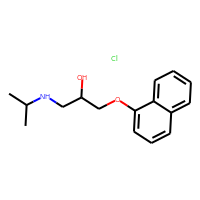

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
data[["smiles","Molecule"]].head(1)

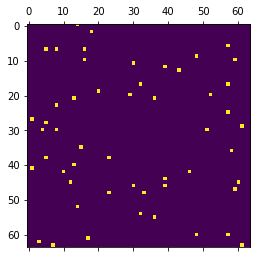

In [ ]:
from math import sqrt
# https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
def mol2fp(mol):
    #원래 ECFP변환 hash크기는 2048이나 64x64의 크기로 보기위해 늘림
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
     
fp =mol2fp(Chem.MolFromSmiles(data.loc[2,"smiles"]))
plt.matshow(fp.reshape((64,-1)) >0)

In [ ]:
#미리 수행해봤을때 비어있는 데이터가 있어 모델 학습시 문제가 발생하였기에 이를 제거하는 부분 
data=data.dropna(axis=0)

In [ ]:
data.isnull().sum()

num         0
name        0
p_np        0
smiles      0
Molecule    0
dtype: int64

In [ ]:
data["FPs"] = data.Molecule.apply(mol2fp)

In [ ]:
#dataframe에 분할되어 저장되어있는 FPs의 값들은 하나의 np.ndarray에 합치는 함수 np.stack사용
X = np.stack(data.FPs.values)
print(X.shape)
print(X)
print(type(X))

(2039, 4096)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In [ ]:
y = data["p_np"].values.reshape((-1,1))
print(y)
print(type(y))

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
<class 'numpy.ndarray'>


In [ ]:
#sklearn의 train_test_splie함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)

In [ ]:
# gpu에서 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cpu


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
y_train

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [1.]])

In [ ]:
X_train.shape, y_train.shape

(torch.Size([1651, 4096]), torch.Size([1651, 1]))

In [ ]:
#TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
#이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력쌍을 주기 위함
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)

In [ ]:
#DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
                                          batch_size=256,
                                          shuffle=True)

## DNN Model

In [ ]:
#나만의 딥러닝 모델 구축
#nn.XXX로 레이어를 추가할 수 있음
#예제의 모델은 (Linear, LayerNorm, LeakyReLU, Dropout)이 한쌍으로 3번 반복되게 구성한 모델임
#단순 Linear 레이어를 쌓았지만 일반화를 위하여 LayerNorm, Dropout을 사용하였음
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(MLPModel, self).__init__()
        # 3개의 fully connected Linear layer를 사용
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer
        #학습 속도 개선을 위한 LayerNorm 레이어 추가
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)        
        #LeakyReLU will be used as the activation function
        self.activation = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        #Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
    #실제 학습시 레이어 사용 부분 
    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)
        #이부분 윗까지 1개의 블록으로 간주할 수 있음
        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #Final output layer
        out = self.fc_out(out)
        out = self.sigmoid(out)
        return out

In [ ]:
#하이퍼 파라미터 세팅
input_size = X_train.size()[-1]     # The input size should fit our fingerprint size
hidden_size = 1024   # The size of the hidden layer
dropout_rate = 0.2   # The dropout rate
output_size = 1        # This is just a single task, so this will be one
learning_rate = 0.0001  # The learning rate for the optimizer

cudamodel = MLPModel(input_size, hidden_size, dropout_rate, output_size)

In [ ]:
#학습 모델이 GPU를 사용한다는 표시
cudamodel.to(device)

MLPModel(
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc_out): Linear(in_features=1024, out_features=1, bias=True)
  (ln1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (ln3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (activation): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
#Loss function과 optimizer를 설정
# binary cross entropy loss 사용
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(cudamodel.parameters(), lr=learning_rate)

## Training

In [ ]:
#gpu모드
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import timeit
start_time = timeit.default_timer()
list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_rocauc = []
cudamodel.train() #Ensure the network is in "train" mode with dropouts active
epochs = 500
for e in range(epochs+1):
    running_loss = 0
    for fps, labels in train_loader:
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pa
         
        output = cudamodel(fps) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        optimizer.step() # Optimize the weights
        running_loss += loss.item()
    else:
        if e%50 == 0:
            validation_loss = criterion(cudamodel(X_validation), y_validation)
            list_acc.append(accuracy_score(y_validation.cpu().detach().numpy(), torch.round(cudamodel(X_validation)).cpu().detach().numpy()))
            list_epoch.append(e)
            list_train_loss.append(running_loss/len(train_loader))
            list_rocauc.append(roc_auc_score(y_validation.cpu().detach().numpy(), torch.round(cudamodel(X_validation)).cpu().detach().numpy()))
            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
            list_val_loss.append(validation_loss.cpu().detach().numpy())
terminate_time = timeit.default_timer()
print("%f초 걸렸습니다."% (terminate_time-start_time))


Epoch:   0 Training loss: 0.34 Validation loss: 0.35
Epoch:  50 Training loss: 0.32 Validation loss: 0.37
Epoch: 100 Training loss: 0.31 Validation loss: 0.35
Epoch: 150 Training loss: 0.30 Validation loss: 0.33
Epoch: 200 Training loss: 0.29 Validation loss: 0.34
Epoch: 250 Training loss: 0.28 Validation loss: 0.33
Epoch: 300 Training loss: 0.27 Validation loss: 0.31
Epoch: 350 Training loss: 0.26 Validation loss: 0.33
Epoch: 400 Training loss: 0.25 Validation loss: 0.33
Epoch: 450 Training loss: 0.24 Validation loss: 0.32
Epoch: 500 Training loss: 0.24 Validation loss: 0.31
65.798872초 걸렸습니다.


## DNN 모델 성능평가

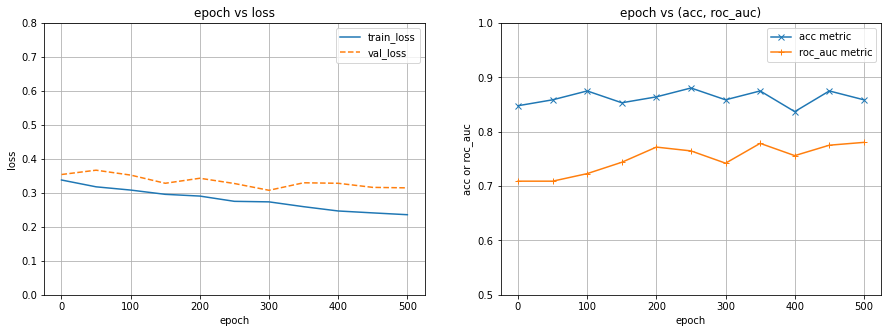

In [ ]:

fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 0.8)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_acc, marker='x', label='acc metric')
ax2.plot(list_epoch, list_rocauc, marker='+', label='roc_auc metric')
ax2.set_ylim(0.5, 1.0)
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc or roc_auc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs (acc, roc_auc)')
plt.show()

In [ ]:
#evaluation mode로 전환
cudamodel.eval()
y_pred_train = cudamodel(X_train)
y_pred_validation = cudamodel(X_validation)
y_pred_test = cudamodel(X_test)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(classes)
    plt.xticks(tick_marks, [0,1], rotation=45)
    plt.yticks(tick_marks, [0,1])

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / float(classes)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Confusion Matrix

Confusion Matrix란? Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표

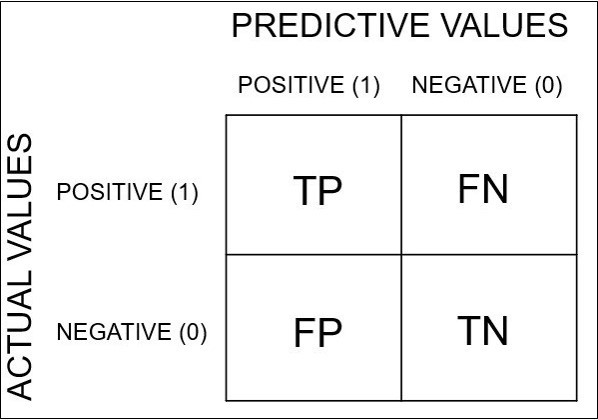

Accuracy(정확도) 정확도=\\(\frac{TP+TN}{TP+FN+FP+TN}\\)

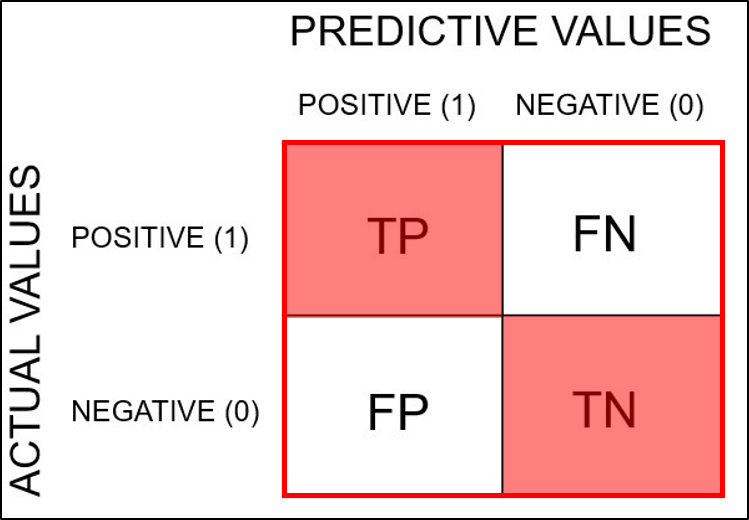

Precision(정밀도)란? 모델이 Positive라 분류한 것 중 실제값이 Positive인 비율
정밀도=\\(\frac{TP}{TP+FP}\\)

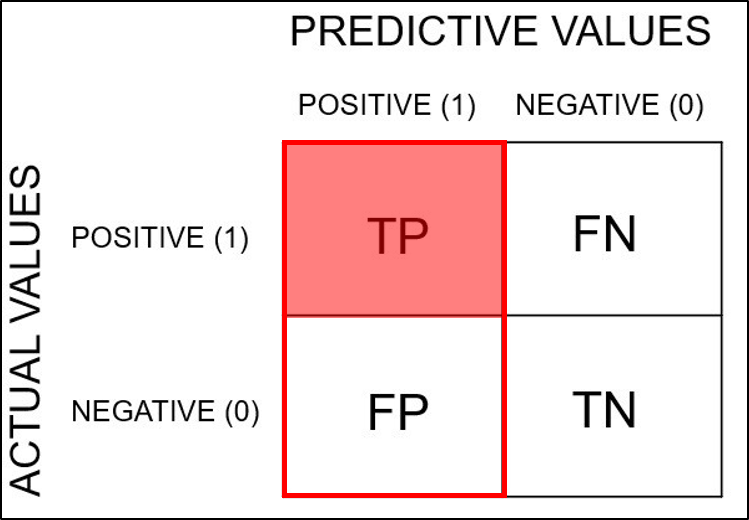

Recall(재현도)란? 실제값이 Positive인 것 중 모델이 Positive라 분류한 비율

Recall(재현도) = \\(\frac{TP}{TP+FN}\\)

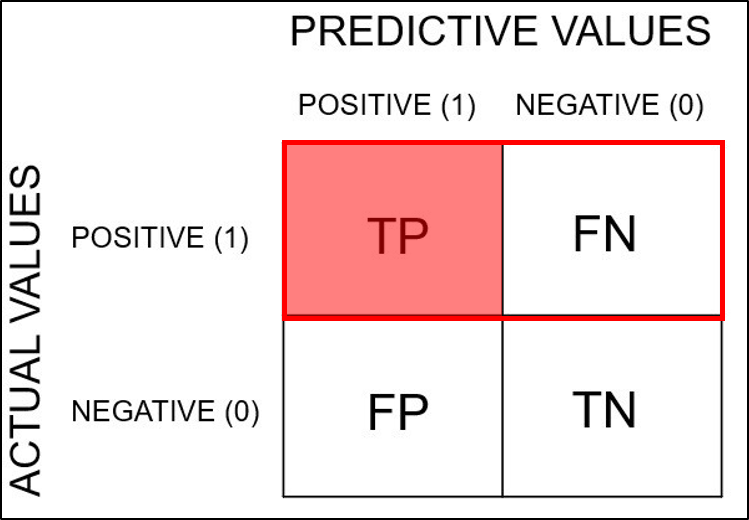

F1 Score란? Precision과 Recall의 조화평균
F1 Score = \\(F1score = \frac{2*Precision*Recall}{Precision+Recall} \\)

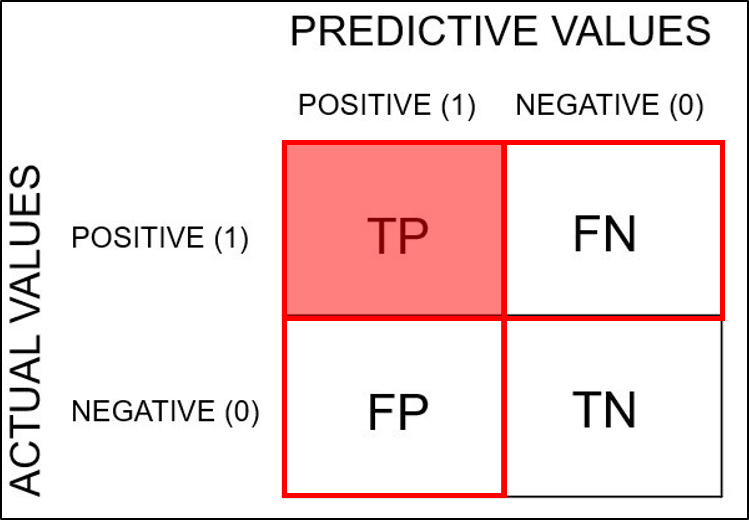

Confusion matrix, without normalization
[[ 32  23]
 [  5 144]]


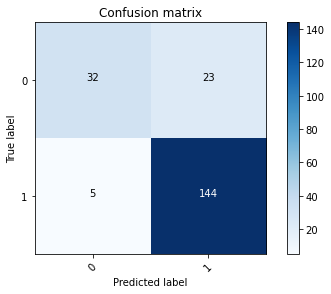

In [ ]:
# 평가 메트릭인 confusion matrix 호출
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.cpu().detach().numpy(),torch.round(y_pred_test).cpu().detach().numpy())
plot_confusion_matrix(cm, 2)

In [ ]:
#직접 acc를 구해보자
acc = (32+144)/(24+31+2+147)
acc

0.8382352941176471

## ROC(Receiver Operator Characteristic) Curve

모델의 성능이 기준선을 넘었는지 확인하기 위해 시각적으로 표현한 그래프

ROC는 분류 모델의 성능을 보여주는 그래프로 TPR과 FPR로 곡선을 그립니다.

\\(TPR(참양성 비율) = \frac{TP}{TP+FN}\\)

\\(FPR(허위 양성 비율) = \frac{FP}{FP+TN}\\)

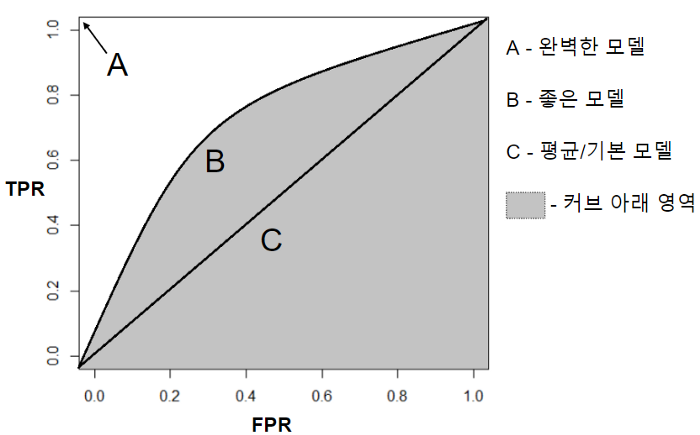

0.774130567419158


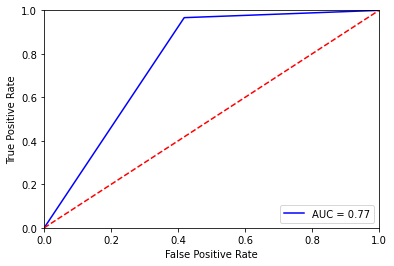

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, thresholds = roc_curve(y_test.cpu().detach().numpy(),torch.round(y_pred_test).cpu().detach().numpy())
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Pytorch를 사용한 QSAR Modeling(Multi-class classification)

## load to data

In [ ]:
!wget https://www.dropbox.com/s/p73eoltinqk4zuo/coronda_data_processed2.csv

--2021-11-24 10:52:47--  https://www.dropbox.com/s/p73eoltinqk4zuo/coronda_data_processed2.csv
www.dropbox.com (www.dropbox.com)을(를) 해석하는 중... 162.125.84.18, 2620:100:6034:18::a27d:5412
접속 www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... 접속됨.
HTTP 요청을 전송했습니다. 응답을 기다리는 중입니다... 301 Moved Permanently
위치: /s/raw/p73eoltinqk4zuo/coronda_data_processed2.csv [따라감]
--2021-11-24 10:52:47--  https://www.dropbox.com/s/raw/p73eoltinqk4zuo/coronda_data_processed2.csv
www.dropbox.com(으)로의 연결을 재사용합니다: 443.
HTTP 요청을 전송했습니다. 응답을 기다리는 중입니다... 302 Found
위치: https://uc89d161624ffb38b2f0eb84da45.dl.dropboxusercontent.com/cd/0/inline/BagREJtGtn5g7Fl-m8NHpHPewQJqeKUZVf4OXKAaZAO5d5ElCvUZJTxO5BPZ_N26oAIgbU2m642YuRTC0Dx-gF6QyRMuxaZ0BlowPsqUPlvvdPNc6QNONN4uJb744-vp9HyiH69rIA79VW714w0B4iRb/file# [따라감]
--2021-11-24 10:52:47--  https://uc89d161624ffb38b2f0eb84da45.dl.dropboxusercontent.com/cd/0/inline/BagREJtGtn5g7Fl-m8NHpHPewQJqeKUZVf4OXKAaZAO5d5ElCvUZJTxO5BPZ_N26oAIgbU2m642YuRTC0Dx-gF6QyRMuxaZ0BlowPsqUPlvv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

corona_data = pd.read_csv("coronda_data_processed2.csv")
corona_data.head()

,Unnamed: 0,molecule_id,smiles,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0,5,5.142668
1,1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0,2,5.026872
2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
4,4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0,5,5.698970


,smiles,Molecule
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,

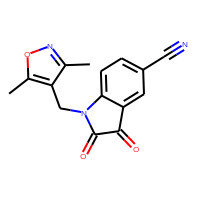

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
PandasTools.AddMoleculeColumnToFrame(corona_data,'smiles','Molecule')
corona_data[["smiles","Molecule"]].head(1)

In [ ]:
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

In [ ]:
corona_data["FPs"] = corona_data.Molecule.apply(mol2fp)

## Data Transform

In [ ]:
corona_data.activity.value_counts()

inactive        104
active           15
intermediate     14
Name: activity, dtype: int64

In [ ]:
#from imblearn.over_sampling import SMOTE
#y=corona_data["activity"]
#smote = SMOTE(random_state=11)
#X, y = smote.fit_sample(X, y)
count_class_1, count_class_2, count_class_3 = corona_data.activity.value_counts()
class_1 = corona_data[corona_data['activity'] == "inactive"]
class_2 = corona_data[corona_data['activity'] == "active"]
class_3 = corona_data[corona_data['activity'] == "intermediate"]

class_2_over = class_2.sample(count_class_1, replace=True)
class_3_over = class_3.sample(count_class_1, replace=True)
corona_data = pd.concat([class_1, class_2_over, class_3_over], axis=0)
print(corona_data.shape)


#print(X.shape, y.shape)
#print(y)
#print(type(y))
#print(y.shape)

(312, 11)


In [ ]:
corona_data.activity.value_counts()

intermediate    104
active          104
inactive        104
Name: activity, dtype: int64

In [ ]:
#dataframe에 분할되어 저장되어있는 FPs의 값들은 하나의 np.ndarray에 합치는 함수 np.stack사용
X = np.stack(corona_data.FPs.values)
print(X.shape)
print(X)
print(type(X))

(312, 4096)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import LabelEncoder
y=corona_data['activity']
print(y)
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
print(y)
print(type(y))

2          inactive
3          inactive
8          inactive
9          inactive
10         inactive
           ...     
4      intermediate
20     intermediate
118    intermediate
1      intermediate
118    intermediate
Name: activity, Length: 312, dtype: object
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'>


In [ ]:
#sklearn의 train_test_split함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).long()
y_test = torch.tensor(y_test, device=device).long()
y_validation = torch.tensor(y_validation, device=device).long()

In [ ]:
print(y_train.shape, y_test.shape, y_validation.shape)

torch.Size([252]) torch.Size([32]) torch.Size([28])


## GPU DNN Model

In [ ]:
#나만의 딥러닝 모델 구축
#nn.XXX로 레이어를 추가할 수 있음
#예제의 모델은 (Linear, LayerNorm, ReLU, Dropout)이 한쌍으로 3번 반복되게 구성한 모델임
#단순 Linear 레이어를 쌓았지만 일반화를 위하여 LayerNorm, Dropout을 사용하였음
class cudaMLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(cudaMLPModel, self).__init__()
        # 3개의 fully connected Linear layer를 사용
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)        
        #ReLU 활성화 함수 추가
        self.activation = nn.ReLU()
        #Dropout 일반화 부분
        self.dropout = nn.Dropout(dropout_rate)
    #실제 학습시 레이어 사용 부분 
    def forward(self, x):
        out = self.linear1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)
        #이부분 윗까지 1개의 블록으로 간주할 수 있음
        out = self.linear2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.linear3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #Final output layer
        out = self.fc_out(out)
        return out

In [ ]:
#하이퍼 파라미터 세팅
input_size = X_train.size()[-1]     # The input size should fit our fingerprint size
hidden_size = 1024   # The size of the hidden layer
dropout_rate = 0.5   # The dropout rate
output_size = 3        # This is just a single task, so this will be one
learning_rate = 0.001  # The learning rate for the optimizer

cudamodel = cudaMLPModel(input_size, hidden_size, dropout_rate, output_size)

In [ ]:
#학습 모델이 GPU를 사용한다는 표시
cudamodel.to(device)

cudaMLPModel(
  (linear1): Linear(in_features=4096, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc_out): Linear(in_features=1024, out_features=3, bias=True)
  (ln1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (ln3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
#TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
#이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력쌍을 주기 위함
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)

In [ ]:
#DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함
#입력 데이터의 크기가 작기때문에 batch_size의 크기를 조정하였음 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=64,
                                          shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
                                          batch_size=64,
                                          shuffle=True)

In [ ]:
#Loss function과 optimizer를 설정
#분류해야할 클래스가 3개이상인경우 CrossEntropy를 사용함
criterion2 = nn.CrossEntropyLoss()
#weight_decay=0
optimizer2 = torch.optim.SGD(cudamodel.parameters(), lr=learning_rate)

## Training

In [ ]:
#gpu모드
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import timeit
start_time = timeit.default_timer()
list_epoch = []
list_train_loss = []
list_val_loss = []
list_val_acc=[]
cudamodel.train() #학습모드 세팅
epochs = 500
for e in range(epochs+1):
    running_loss = 0
    for fps, labels in train_loader:
        # Training pass
        optimizer2.zero_grad()
        output = cudamodel(fps) #Forward pass of the mini-batch
        loss = criterion2(output.squeeze(), labels) #Computing the loss
        loss.backward() # calculate the backward pass
        optimizer2.step() # Optimize the weights
        running_loss += loss.item()
    else:
        if e%50 == 0:
            validation_loss = criterion2(cudamodel(X_validation), y_validation)
            validation_acc = accuracy_score(y_validation.cpu().detach().numpy(),cudamodel(X_validation).cpu().detach().max(dim=1)[1].numpy())
            list_epoch.append(e)
            list_train_loss.append(running_loss/len(train_loader))
            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
            list_val_loss.append(validation_loss.cpu().detach().numpy())
            list_val_acc.append(validation_acc)
            
            
terminate_time = timeit.default_timer()
print("%f초 걸렸습니다."% (terminate_time-start_time))


Epoch:   0 Training loss: 0.20 Validation loss: 0.09
Epoch:  50 Training loss: 0.21 Validation loss: 0.06
Epoch: 100 Training loss: 0.20 Validation loss: 0.05
Epoch: 150 Training loss: 0.20 Validation loss: 0.09
Epoch: 200 Training loss: 0.20 Validation loss: 0.04
Epoch: 250 Training loss: 0.19 Validation loss: 0.05
Epoch: 300 Training loss: 0.14 Validation loss: 0.05
Epoch: 350 Training loss: 0.20 Validation loss: 0.05
Epoch: 400 Training loss: 0.19 Validation loss: 0.07
Epoch: 450 Training loss: 0.19 Validation loss: 0.05
Epoch: 500 Training loss: 0.19 Validation loss: 0.04
21.946748초 걸렸습니다.


In [ ]:
list_val_loss

[array(0.08915645, dtype=float32),
 array(0.05947049, dtype=float32),
 array(0.04978823, dtype=float32),
 array(0.08546051, dtype=float32),
 array(0.04121116, dtype=float32),
 array(0.0497501, dtype=float32),
 array(0.04597824, dtype=float32),
 array(0.05237513, dtype=float32),
 array(0.06580302, dtype=float32),
 array(0.05054085, dtype=float32),
 array(0.04226818, dtype=float32)]

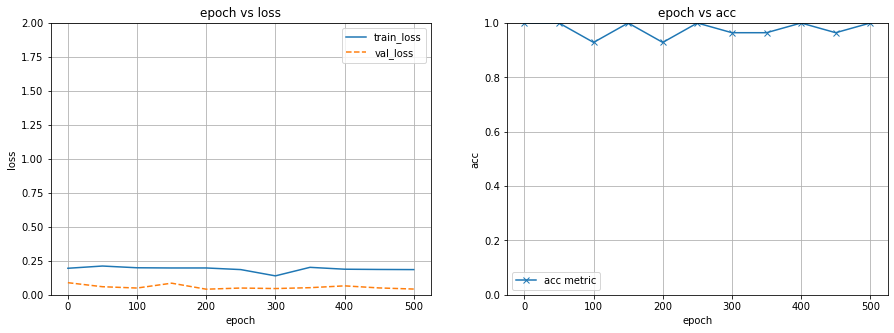

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0.0, 2.0)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_val_acc, marker='x', label='acc metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')
ax2.set_ylim(0, 1.0)
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs acc')


plt.show()

In [ ]:
#evaluation mode로 전환
cudamodel.eval()
y_pred_train = cudamodel(X_train)
y_pred_validation = cudamodel(X_validation)
y_pred_test = cudamodel(X_test)

3개의 클래스에 대한 컨퓨젼 매트릭스를 그려서 확인하여도되지만 해석이 어렵기때문에 직접 비교를 해보자.

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test.cpu().detach().numpy(),y_pred_test.cpu().detach().max(dim=1)[1].numpy())
print(y_test.cpu().detach().numpy())
print(y_pred_test.cpu().detach().max(dim=1)[1].numpy())

[2 1 1 1 1 1 1 0 2 1 1 0 0 0 0 2 1 2 0 2 1 2 2 2 1 0 0 1 2 2 2 1]
[2 1 1 1 1 1 1 0 2 1 1 0 0 0 0 2 1 2 0 2 1 0 2 2 1 0 0 1 2 2 2 0]


앞서 언급했던 confusion_matrix를 사용해 평가 metrica들을 한번에 출력해주는 강력한 함수가 있었다. classification_report함수를 사용하면 아래와 같은 성능과 관련된 평가메트릭을 한번에 출력해준다.

In [ ]:
import sklearn.metrics as skm
print(skm.classification_report(y_test.cpu().detach().numpy(),y_pred_test.cpu().detach().max(dim=1)[1].numpy()))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.92      0.96        13
           2       1.00      0.91      0.95        11

    accuracy                           0.94        32
   macro avg       0.93      0.94      0.93        32
weighted avg       0.95      0.94      0.94        32

